# **Customer Personality Analysis**

**Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings("ignore")

### **Data Ingestion**  

Reading the dataset into a Pandas DataFrame.


In [2]:
df =pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/marketing_campaign.csv", sep=";")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

The dataset contains a total of **2240 rows** and **29 columns (features)**.


In [4]:
numericals_features=[i for i in df.columns if df[i].dtype!="O"]
df[numericals_features].corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331


In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

There are some missing (null) values in the **Income** feature.


# Dataset Column Description

| Column Name           | Non-Null Count | Data Type  | Description |
|----------------------|---------------|-----------|-------------|
| **ID**              | 2240 non-null  | int64     | Unique customer ID |
| **Year_Birth**      | 2240 non-null  | int64     | Year of birth of the customer |
| **Education**       | 2240 non-null  | object    | Educational level of the customer |
| **Marital_Status**  | 2240 non-null  | object    | Marital status of the customer |
| **Income**         | 2216 non-null  | float64   | Yearly income of the customer (some missing values) |
| **Kidhome**        | 2240 non-null  | int64     | Number of small children in the household |
| **Teenhome**       | 2240 non-null  | int64     | Number of teenagers in the household |
| **Dt_Customer**    | 2240 non-null  | object    | Date of customer's enrollment |
| **Recency**        | 2240 non-null  | int64     | Number of days since the last purchase |
| **MntWines**       | 2240 non-null  | int64     | Amount spent on wine products |
| **MntFruits**      | 2240 non-null  | int64     | Amount spent on fruit products |
| **MntMeatProducts**| 2240 non-null  | int64     | Amount spent on meat products |
| **MntFishProducts**| 2240 non-null  | int64     | Amount spent on fish products |
| **MntSweetProducts**| 2240 non-null  | int64     | Amount spent on sweet products |
| **MntGoldProds**   | 2240 non-null  | int64     | Amount spent on gold products |
| **NumDealsPurchases**| 2240 non-null  | int64   | Number of purchases made with a discount deal |
| **NumWebPurchases** | 2240 non-null  | int64     | Number of purchases made through the website |
| **NumCatalogPurchases** | 2240 non-null | int64   | Number of purchases made using a catalog |
| **NumStorePurchases** | 2240 non-null | int64   | Number of purchases made directly in stores |
| **NumWebVisitsMonth** | 2240 non-null | int64   | Number of visits to the company's website in the last month |



### Observing Numerical Columns


In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### **Data Cleaning**

**Lets see Total no. of Null Values present in a Dataset.**

In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

We can see that the **Income** column contains 24 missing (null) values. Let's either replace or drop them.  

There might be a possibility that the **Income** column contains outliers.


In [9]:
## Let's replace the null values with the median if outliers are present
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


### Droping NaN Values 


In [10]:
df=df.dropna()

In [11]:
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


### Observing Duplicate Values


In [12]:
df.duplicated().sum()

0

**There are no duplicate values in the DataFrame.**


### Observing Each Feature in the DataFrame


In [13]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [14]:
df.Dt_Customer.dtype

dtype('O')

### Observing the DataFrame Features 

The **Dt_Customer** column represents dates, but its data type is currently **object (string)**.  
Let's clean this column by converting it to a proper **datetime** format.  

Additionally, we can extract new features like **Year** of enrollment and **Month**  of enrollment for further analysis.


In [15]:
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"])
df["Dt_Customer"].dtype

dtype('<M8[ns]')

### **EDA and Feature Engineering**

**Now Dt_Customer feature converted into datatime format**

In [16]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### let's observe customer marital status

In [17]:
df["Marital_Status"].value_counts(normalize=True) * 100


Marital_Status
Married     38.673285
Together    25.857401
Single      21.254513
Divorced    10.469314
Widow        3.429603
Alone        0.135379
Absurd       0.090253
YOLO         0.090253
Name: proportion, dtype: float64

In [18]:
# Grouping similar categories
df['Marital_Status'].replace(
    {"Married": "Partner", "Together": "Partner", 
     "ALone" :"Alone", "Divorced": "Alone", "Widow": "Alone" , "Single":"Alone"}, 
    inplace=True
)

# Replacing unusual values with the most common marital status
most_common_status = df['Marital_Status'].mode()[0]  # Extracting the most frequent value
df['Marital_Status'].replace({"Absurd": most_common_status, "YOLO": most_common_status}, inplace=True)
marital_count=df['Marital_Status'].value_counts().reset_index()
marital_count


,Marital_Status,count
0,Partner,1434
1,Alone,782


### Explanation

**Standardizing Categories:**

**Married** and **Together** → **Partner**

**Single**, **Divorced**, and **Widow** → **Single**

**Handling Outliers:**
    **Absurd**  and **YOLO** are replaced with the most frequent marital status

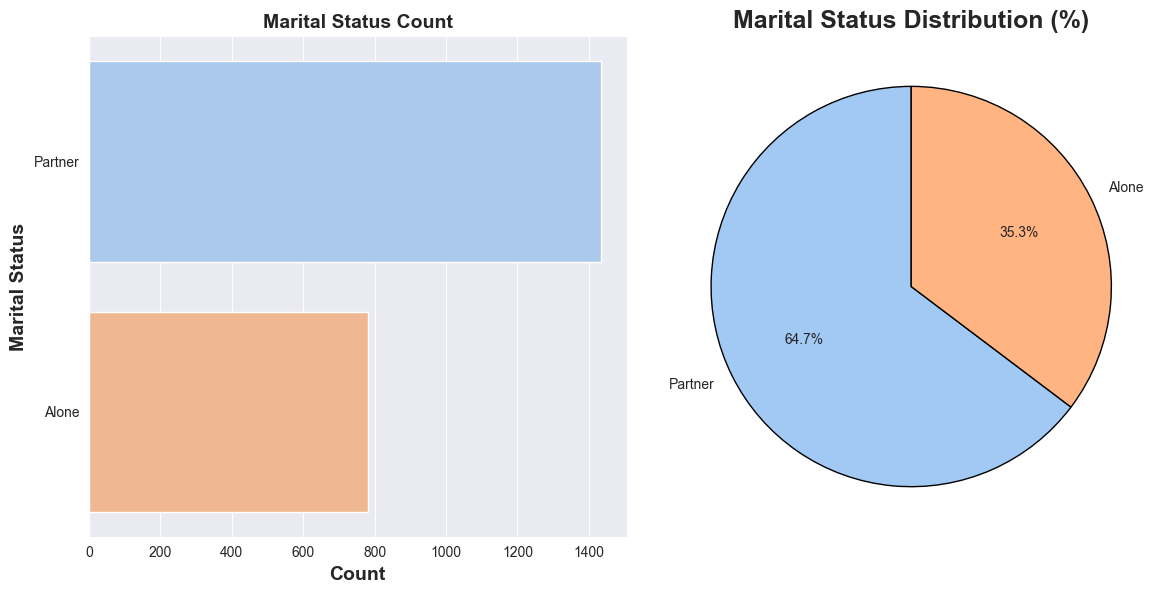

In [19]:
# Set theme for better visuals
sns.set_style("darkgrid")

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar Plot for Marital Status Count
sns.barplot(
    data=marital_count, 
    y='Marital_Status', 
    x='count', 
    ax=ax1, 
    palette="pastel"
)
ax1.set_title("Marital Status Count", fontsize=14 , fontweight="bold")
ax1.set_xlabel("Count", fontsize=14 , fontweight="bold")
ax1.set_ylabel("Marital Status" , fontsize=14 , fontweight="bold")

# Pie Chart for Marital Status Distribution
marital_distribution = df['Marital_Status'].value_counts(normalize=True) * 100
ax2.pie(
    marital_distribution, 
    labels=marital_distribution.index, 
    autopct='%1.1f%%', 
    colors=sns.color_palette("pastel"), 
    startangle=90, 
    wedgeprops={'edgecolor': 'black'}
)
ax2.set_title("Marital Status Distribution (%)",fontsize=18 , fontweight="bold")

# Display the plot
plt.tight_layout()
plt.show()


`In the pie chart, Single customers make up about 35%, while customers with a partner account for around 64%. This highlights a significant majority of partnered customers in the dataset.`

## 📌 Extracting Month and Year from `Dt_Customer`

The following code extracts the **month** and **year** from the `Dt_Customer` column, which contains customer enrollment dates. This helps in analyzing enrollment trends over time.


In [20]:
df["month_enroll"] = df["Dt_Customer"].dt.month  # Extracts the month of enrollment
df["year_enroll"] = df["Dt_Customer"].dt.year    # Extracts the year of enrollment

# Display the extracted month and year
df[["month_enroll", "year_enroll"]]

,month_enroll,year_enroll
0,9,2012
1,3,2014
2,8,2013
3,2,2014
4,1,2014
...,...,...
2235,6,2013
2236,6,2014
2237,1,2014
2238,1,2014


In [21]:
df["Education"]

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: Education, Length: 2216, dtype: object

In [22]:
df["Education"]=df["Education"].replace(to_replace={"Graduation" :"Undergraduate" ,"Master":"Postgraduate" ,"2n Cycle":"Postgraduate","Basic":"Undergraduate" })

In [23]:
education_=df["Education"].value_counts().reset_index()
education_

,Education,count
0,Undergraduate,1170
1,Postgraduate,565
2,PhD,481


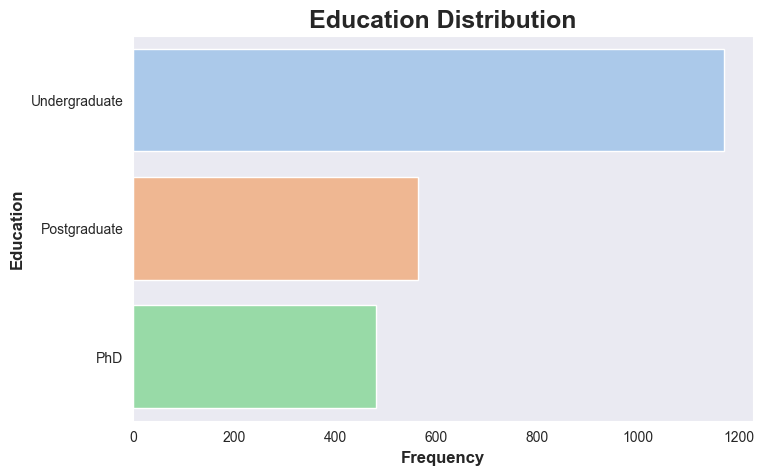

In [24]:
plt.figure(figsize=(8,5))
sns.set_style("dark")
sns.barplot(data=education_ , x="count" , y="Education" , palette="pastel")
plt.title("Education Distribution" ,fontsize=18 , fontweight="bold")
plt.xlabel("Frequency" ,fontsize=12 , fontweight="bold")
plt.ylabel("Education" , fontsize=12 , fontweight="bold")
plt.show()

## 🎓 Education Level Analysis  

- 📈 **Higher Number of Graduated Customers**: The majority of customers have completed **graduation**, making them the largest segment.  
- 📉 **Fewer School-Level Customers**: Customers with **basic education (school level)** are the least represented, indicating a smaller market segment.  

🔹 **Insight:**  
Higher education levels may indicate **better financial stability**, influencing purchasing behavior and product preferences.  


In [25]:
df["Year_Birth"]

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2216, dtype: int64

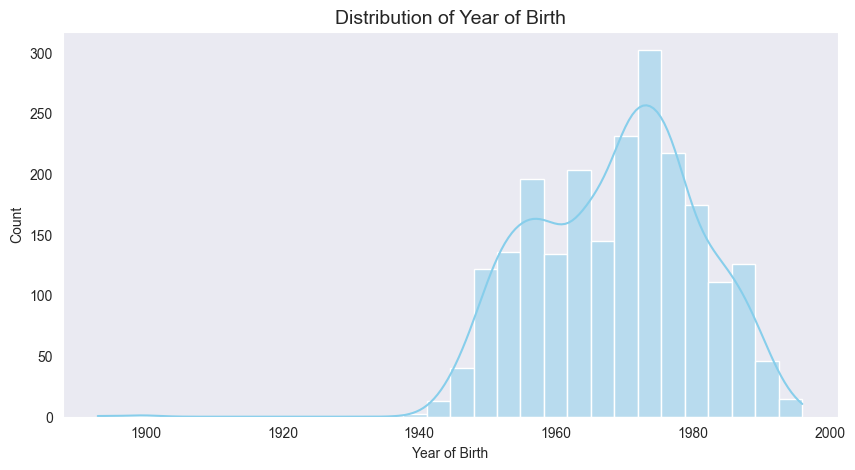

In [26]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Year_Birth"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Year of Birth", fontsize=14)
plt.xlabel("Year of Birth")
plt.ylabel("Count")
plt.show()


### Generational Categories

Here’s a breakdown of the generational categories:

#### **Gen Z (Born from 1997 onwards)**:
- **Gen Z** includes people who were born after 1996, typically those growing up in the 21st century.
- They are known for being digital natives, with access to technology and the internet from a very young age.
- Members of Gen Z are typically in their teens and early twenties today.

#### **Millennials (Born between 1981 and 1996)**:
- **Millennials**, also known as **Generation Y**, were born between 1981 and 1996.
- This generation witnessed the rise of the internet and the transition from analog to digital technology.
- They are characterized by their familiarity with both traditional media and new digital technologies, such as social media, smartphones, and the internet.

#### **Gen X (Born between 1965 and 1980)**:
- **Gen X** refers to those born between 1965 and 1980.
- Often seen as the first generation to embrace personal computers and video games, they experienced the rise of the internet and the shifting dynamics of the workforce.
- Gen Xers are often seen as independent, resourceful, and skeptical due to growing up in a time of economic and social change.

#### **Baby Boomers (Born between 1946 and 1964)**:
- **Baby Boomers** were born between 1946 and 1964, following World War II.
- This generation is known for experiencing significant social change, economic prosperity, and a growing middle class.
- They are often associated with values such as hard work, stability, and traditional family structures.

#### **Silent Generation (Born before 1946)**:
- The **Silent Generation** includes those born before 1946.
- They grew up during the Great Depression and World War II, which shaped their values and behaviors.
- This generation is often characterized by a more conservative and traditional approach to life, with an emphasis on duty, discipline, and respect for authority.

These categories are based on broad societal trends and historical events, and they are often used for marketing, research, and sociological analysis to understand generational differences in attitudes, behaviors, and values.


In [27]:
def categorize_generation(year):
    if year >= 1997:
        return "Gen Z"
    elif year >= 1981:
        return "Millennials"
    elif year >= 1965:
        return "Gen X"
    elif year >= 1946:
        return "Baby Boomers"
    else:
        return "Silent Generation"

df["Generation"]= df["Year_Birth"].apply(categorize_generation)


## 📌 Observations on Customer Generations  

- **Gen X (1069 customers)** → Largest group, likely financially stable and brand-loyal.  
- **Baby Boomers (759 customers)** → Older customers, may have high retention but lower spending.  
- **Millennials (385 customers)** → Youngest group, tech-savvy, and more responsive to digital engagement.  

### 🔍 **Key Insights for Model Training**  
- Generational differences impact **spending, loyalty, and product preferences**.  
- **Gen X & Boomers** may have higher retention, while **Millennials** require engagement strategies.  
- Encoding this feature can improve predictions for **spending behavior, churn, and targeted marketing**. 🚀  


### Let's Calculate the Age of Customers Using the Year_Birth Column  


In [28]:
today_age=2025 #current year
df["Age"]=today_age - df["Year_Birth"]  #calculating 

### Observing Kids in the Family

The dataset contains two features related to children in a family:  

- **Kidhome**: Number of small children in the household.  
- **Teenhome**: Number of teenagers in the household.  


In [29]:
print(df["Kidhome"].unique())
print(df["Teenhome"].unique())

[0 1 2]
[0 1 2]



### To get the total number of kids in each family, we can sum these two columns:
- **Kidhome**: Number of small children in the household.  
- **Teenhome**: Number of teenagers in the household. 

In [30]:
df['Childrens']= df["Kidhome"] +df["Teenhome"]
df.drop(["Kidhome" , "Teenhome"] , axis=1 , inplace=True) 
df['Childrens']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Childrens, Length: 2216, dtype: int64

### Observing Customer Purchases

In [31]:
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


In [32]:
#Calculating total product spending per customer
df["customer_spending"] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df.rename(columns={'MntWines':'wines', 'MntFruits':'fruits', 'MntMeatProducts':'meat',  'MntFishProducts':'fist', 'MntSweetProducts':'sweets', 'MntGoldProds':'golds'} , inplace=True)
df[["customer_spending"]].head()

,customer_spending
0,1617
1,27
2,776
3,53
4,422


### Summing All Product Purchases by Each Customer 

In the dataset, multiple features represent the amount spent by customers on different product categories. These include:  

- **MntWines**: Amount spent on wine.  
- **MntFruits**: Amount spent on fruits.  
- **MntMeatProducts**: Amount spent on meat products.  
- **MntFishProducts**: Amount spent on fish products.  
- **MntSweetProducts**: Amount spent on sweet products.  
- **MntGoldProds**: Amount spent on gold products.  

To analyze the overall spending behavior of customers, we will sum all these features into a new column called **Customer_Spending**. This will help us understand:  

- The total amount each customer has spent on products.  
- Potential high-value customers who contribute the most to total sales.  
- Patterns in customer purchasing behavior for further analysis.

### Analyzing Customer Purchase Behavior

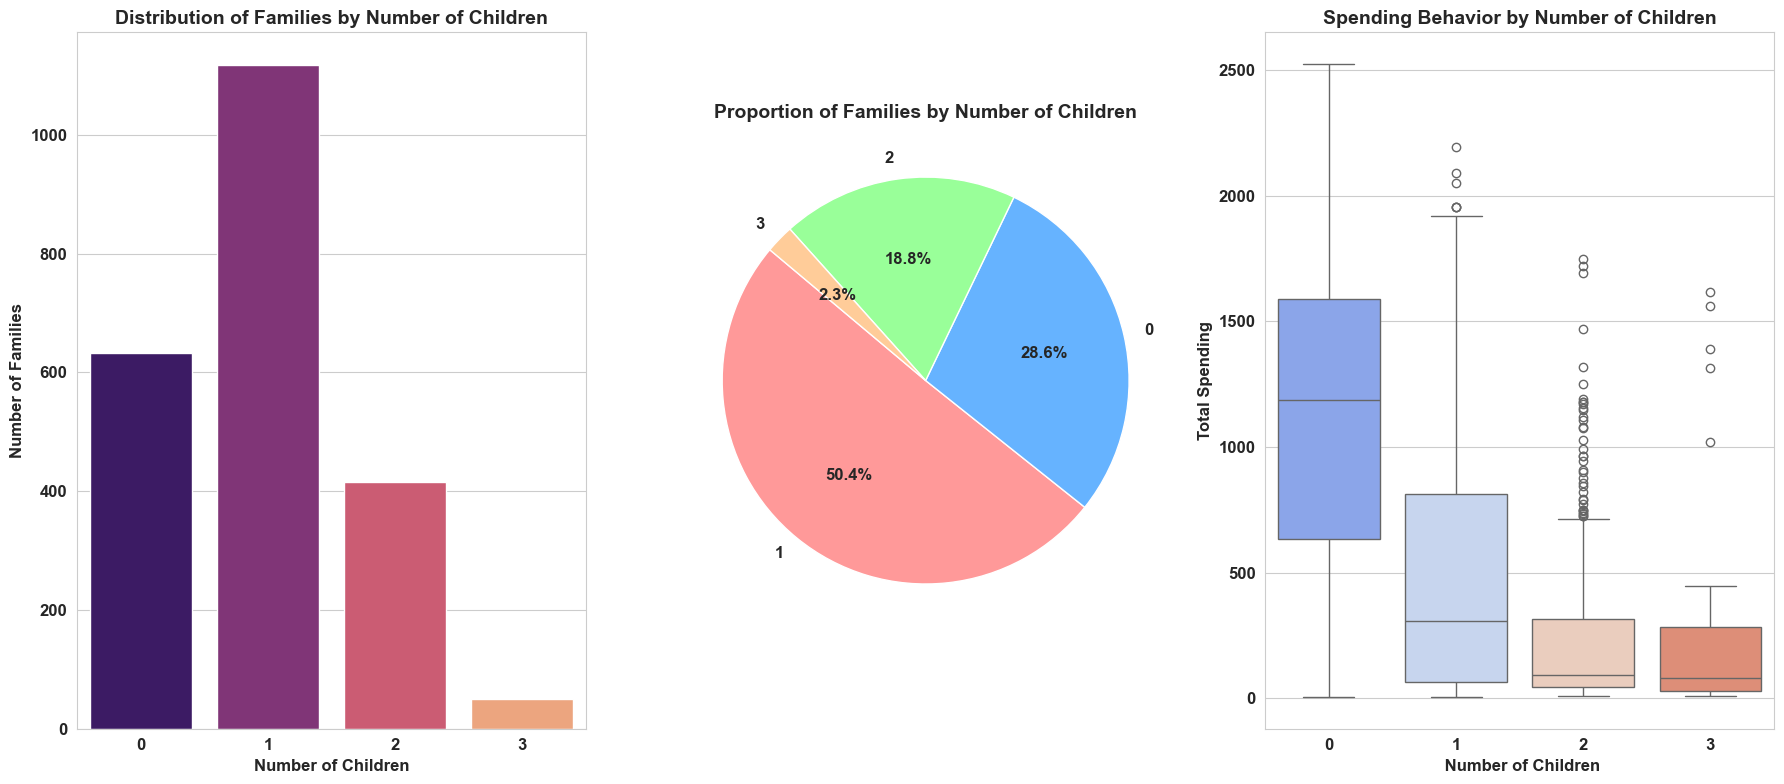

In [33]:
# Set modern style
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12, 'font.weight': 'bold'})  # Bold fonts

# Create figure with 3 plots
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# 🔹 1. Bar Chart - Family Distribution by Number of Children
sns.barplot(x=df["Childrens"].value_counts().index, 
            y=df["Childrens"].value_counts(), 
            palette="magma", ax=axes[0])
axes[0].set_title("Distribution of Families by Number of Children", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Number of Children", fontweight="bold")
axes[0].set_ylabel("Number of Families", fontweight="bold")

# 🔹 2. Pie Chart - Proportion of Families by Number of Children
colors = ["#FF9999", "#66B3FF", "#99FF99", "#FFCC99"]
df["Childrens"].value_counts().plot.pie(autopct="%1.1f%%", colors=colors, startangle=140, ax=axes[1])
axes[1].set_title("Proportion of Families by Number of Children", fontsize=14, fontweight="bold")
axes[1].set_ylabel("")  # Remove y-label for better clarity

# 🔹 3. Box Plot - Spending Behavior Based on Number of Children
sns.boxplot(x=df["Childrens"], y=df["customer_spending"], palette="coolwarm", ax=axes[2])
axes[2].set_title("Spending Behavior by Number of Children", fontsize=14, fontweight="bold")
axes[2].set_xlabel(" Number of Children", fontweight="bold")
axes[2].set_ylabel("Total Spending", fontweight="bold")

# Adjust layout for clarity
plt.tight_layout()
plt.show()


## 🔍 **Observations on Customer Spending by Number of Children**

- **👶 50%** of customers have **1 child**,  
- **🚫 20%** have **no children**,  
- **👨‍👩‍👧 19%** have **2 children**, and  
- **👨‍👩‍👧‍👦 3%** have **3 children**.  

### 💰 **Spending Patterns**
- **High spenders** are mostly found among customers **with children**.  
- Customers **with 1 child** tend to **spend the most**, with some extreme outliers.  
- Customers **with 2 children** show **many outliers** in spending.  
- Some **3-child customers** also have **higher spending outliers**.  
- **No outliers** are observed among customers **without children**.  


### **Final Insights on Customer Spending & Children Count**

1️⃣ **High spenders** are predominantly found among **customers with children**.  
2️⃣ **Customers with 1 child** have **the highest spending** with **some extreme outliers**.  
3️⃣ **Customers with 2 children** show **significant spending variation**, with **many outliers**.  
4️⃣ **Customers with 3 children** have **a few high spenders**, but spending is **less predictable**.  
5️⃣ **Customers without children** have a **more balanced spending pattern**, with **no extreme outliers**.  
6️⃣ The presence of **outliers in families with children** suggests **varying financial priorities** and **spending habits**.  

### 🔥 **Business Takeaway**
- **Target high spenders** by offering **personalized promotions** to families with **1 or 2 children**.  
- **Understand spending variation** among families with **multiple children** to design better **marketing strategies**.  
- **No-child customers** have **steady spending**, making them ideal for **consistent engagement strategies**.  


In [34]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Dt_Customer', 'Recency', 'wines', 'fruits', 'meat', 'fist', 'sweets',
       'golds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'month_enroll',
       'year_enroll', 'Generation', 'Age', 'Childrens', 'customer_spending'],
      dtype='object')

In [35]:
df.rename(columns={'NumDealsPurchases' : 'DealsPurchases' ,'NumWebPurchases': 'onlinePurchases' , 'NumCatalogPurchases' : 'CatalogPurchases'  ,'NumStorePurchases' :'StorePurchases'} , inplace=True)
df[['DealsPurchases' , 'onlinePurchases' ,'CatalogPurchases' , 'StorePurchases']]

,DealsPurchases,onlinePurchases,CatalogPurchases,StorePurchases
0,3,8,10,4
1,2,1,1,2
2,1,8,2,10
3,2,2,0,4
4,5,5,3,6
...,...,...,...,...
2235,2,9,3,4
2236,7,8,2,5
2237,1,2,3,13
2238,2,6,5,10


 To understand how customers interact with different purchasing channels, we extract the following features from the dataset:  

- **Deals**: Number of purchases made using a discount or deal.  
- **online**: Number of purchases made through the website.  
- **Catalog**: Number of purchases made via catalog orders.  
- **Store**: Number of purchases made in physical stores.  


In [36]:
df["Childrens"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Childrens, Length: 2216, dtype: int64

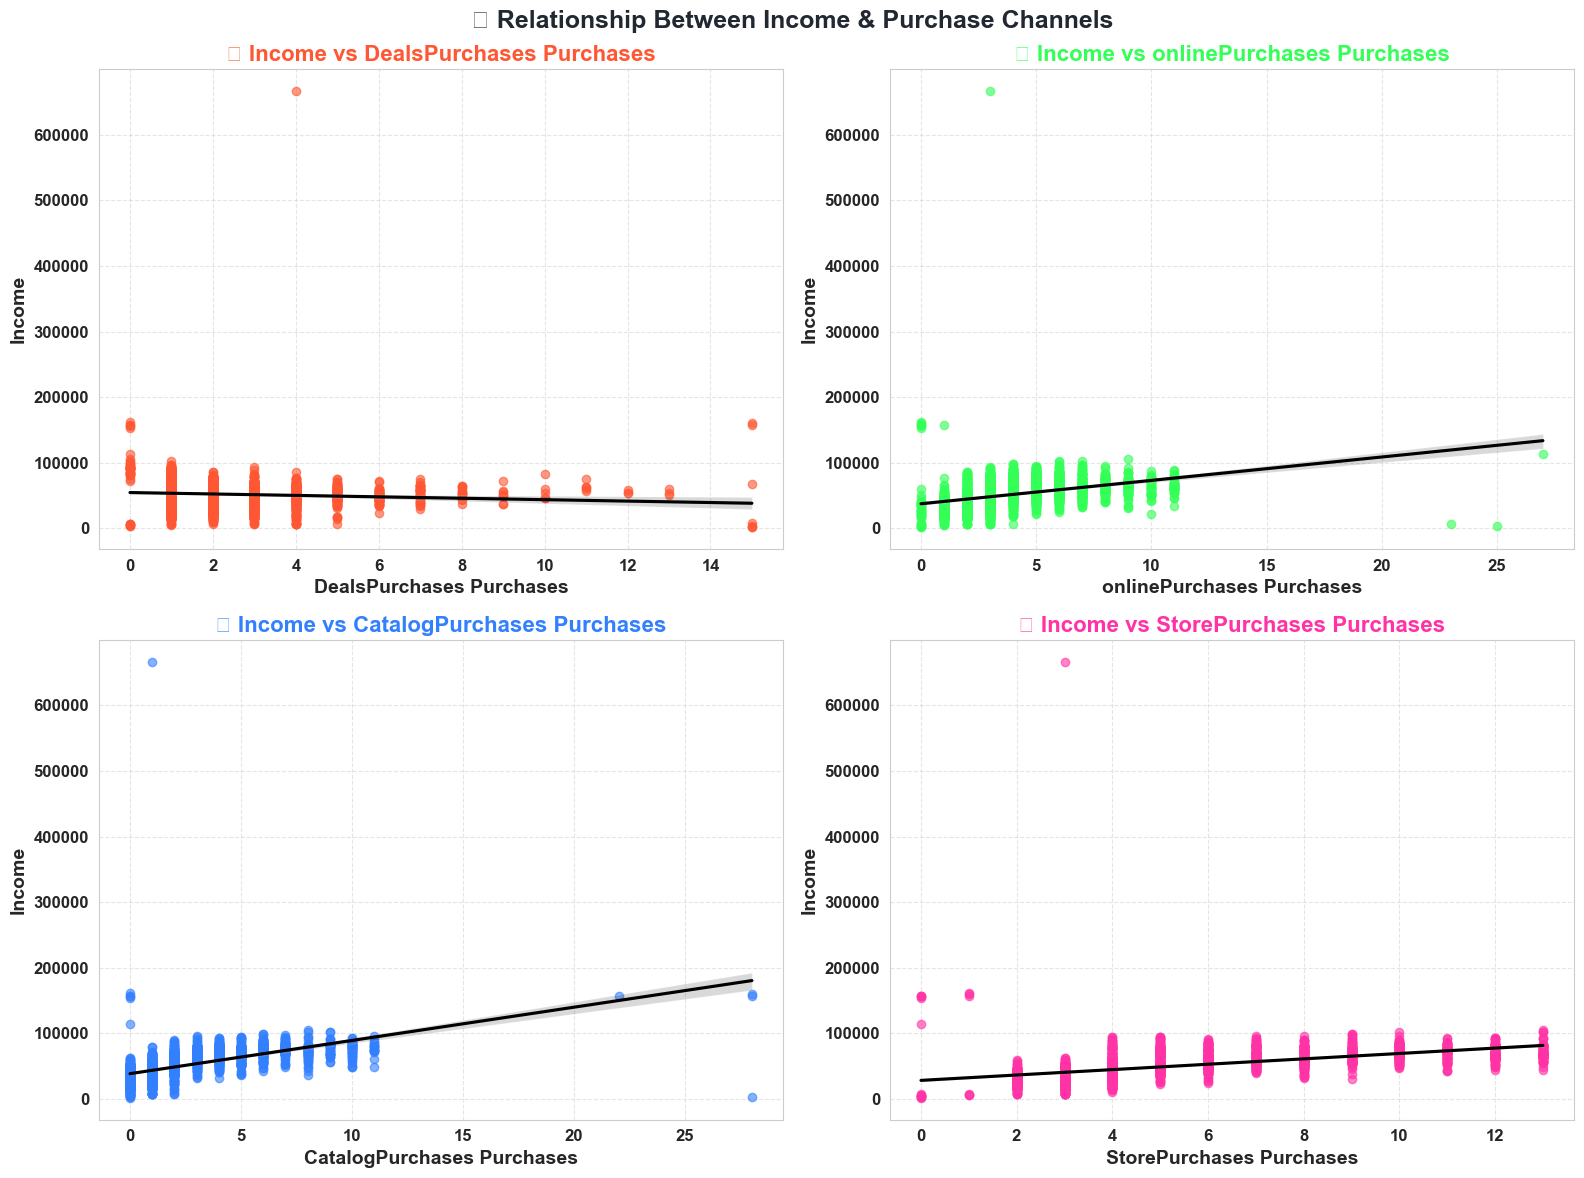

In [37]:

# Define purchase channels
purchase_channels = ['DealsPurchases', 'onlinePurchases', 'CatalogPurchases', 'StorePurchases']

# Set up the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2x2 layout
axes = axes.flatten()  # Flatten for easier looping

# Define a vibrant color palette for better visuals
colors = ["#FF5733", "#33FF57", "#3380FF", "#FF33A6"]

# Loop through each purchase channel and plot
for i, channel in enumerate(purchase_channels):
    # Regression plot with a smooth trendline
    sns.regplot(x=df[channel], y=df["Income"], scatter_kws={'alpha':0.6, 'color': colors[i]}, line_kws={'color': 'black'}, ax=axes[i])
    
    # Styling
    axes[i].set_title(f"💰 Income vs {channel} Purchases", fontsize=16, fontweight='bold', color=colors[i])
    axes[i].set_xlabel(f"{channel} Purchases", fontsize=14, fontweight='bold')
    axes[i].set_ylabel("Income", fontsize=14, fontweight='bold')
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Adjust layout for clarity
plt.suptitle("📊 Relationship Between Income & Purchase Channels", fontsize=18, fontweight='bold', color="#222831")
plt.tight_layout()
plt.show()


### Analyzing Customer Engagement in Marketing Campaigns 

To understand how many marketing campaigns each customer has accepted, we create a new feature:  
 



In [38]:
df['Compaigns_Engagement']=df['AcceptedCmp3'] + df['AcceptedCmp4'] +df['AcceptedCmp5'] +df['AcceptedCmp1']+df['AcceptedCmp2']
df[['Compaigns_Engagement']]


,Compaigns_Engagement
0,0
1,0
2,0
3,0
4,0
...,...
2235,0
2236,1
2237,1
2238,0


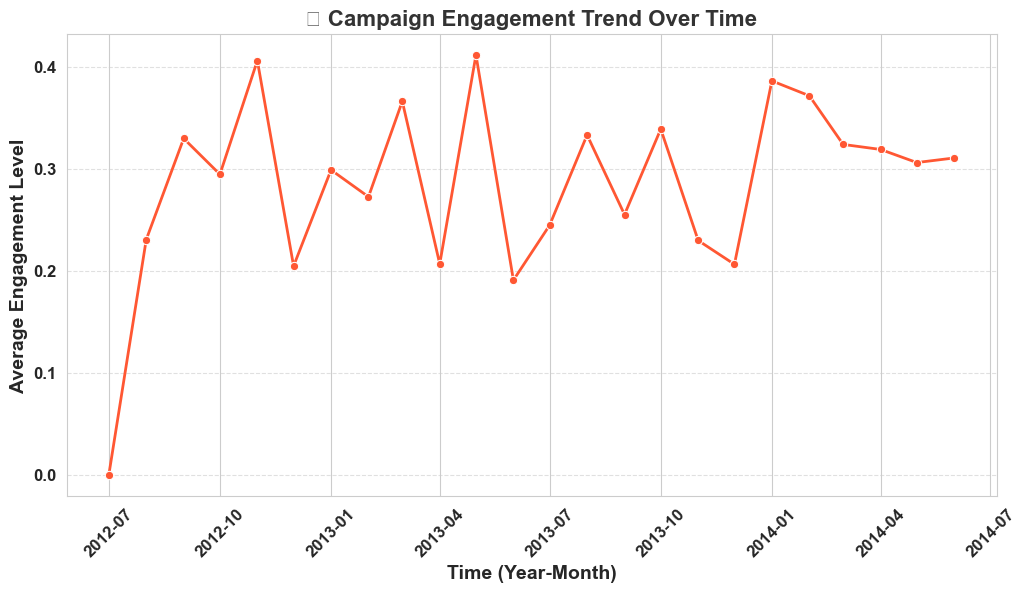

In [39]:

# Ensure 'Dt_Customer' is in datetime format (if not already)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Aggregate engagement by month & year
engagement_trend = df.groupby(df['Dt_Customer'].dt.to_period('M'))["Compaigns_Engagement"].mean()

# Convert index back to datetime for plotting
engagement_trend.index = engagement_trend.index.to_timestamp()

# Create a figure
plt.figure(figsize=(12, 6))

# Line Plot
sns.lineplot(x=engagement_trend.index, y=engagement_trend, marker='o', color="#FF5733", linewidth=2)

# Styling
plt.title("📈 Campaign Engagement Trend Over Time", fontsize=16, fontweight='bold', color="#333")
plt.xlabel("Time (Year-Month)", fontsize=14, fontweight='bold')
plt.ylabel("Average Engagement Level", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)  # Rotate x-axis for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


### 📊 **Customer Enrollment Trend Analysis**  

- 📈 **Gradual Increase** – Customer enrollment **steadily increased** from mid-2012 to early 2014.  
- 🔥 **Peak Enrollment Months** – **November 2012 (40.6%)** and **May 2013 (40.7%)** saw the highest enrollment rates.  
- ❄️ **Drop in Enrollment** – Enrollment was **lower in December and April** across multiple years, indicating possible seasonal effects.  
- 📉 **Fluctuations in 2013** – Enrollment rates fluctuated but remained **relatively stable**, with **peaks in March, August, and October**.  
- 🔄 **Consistent Enrollment in 2014** – From **January to June 2014**, the enrollment rate **stabilized around 30-37%**, showing a steady trend.  

### 🔹 **Insight:**  
Understanding peak enrollment periods can help businesses **optimize marketing efforts** and **introduce targeted promotions** during high-activity months. 🚀  


### **Removing Irrelavent Features**

In [40]:
df[['ID' , 'Year_Birth' ,'Dt_Customer' ,'Complain' ,'Response']]

,ID,Year_Birth,Dt_Customer,Complain,Response
0,5524,1957,2012-09-04,0,1
1,2174,1954,2014-03-08,0,0
2,4141,1965,2013-08-21,0,0
3,6182,1984,2014-02-10,0,0
4,5324,1981,2014-01-19,0,0
...,...,...,...,...,...
2235,10870,1967,2013-06-13,0,0
2236,4001,1946,2014-06-10,0,0
2237,7270,1981,2014-01-25,0,0
2238,8235,1956,2014-01-24,0,0


### **Feature Selection**

In [41]:
df['Income_to_Spending_Ratio'] = df['Income'] / df['customer_spending']

In [42]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Dt_Customer', 'Recency', 'wines', 'fruits', 'meat', 'fist', 'sweets',
       'golds', 'DealsPurchases', 'onlinePurchases', 'CatalogPurchases',
       'StorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
       'Z_CostContact', 'Z_Revenue', 'Response', 'month_enroll', 'year_enroll',
       'Generation', 'Age', 'Childrens', 'customer_spending',
       'Compaigns_Engagement', 'Income_to_Spending_Ratio'],
      dtype='object')

### **Saving Cleaned Dataset**

In [43]:
main_project_directory = os.path.abspath(os.path.join(os.getcwd() ,"..") )
file_path=os.path.join(main_project_directory , "dataset" ,"cleaned_customer.csv")
df.to_csv(file_path , index=False , header=True)

In [44]:
df.drop(['ID' ,'Year_Birth' , 'Dt_Customer'] , axis=1 , inplace=True)

In [45]:
def plot_highly_correlated_features(df, correlation_threshold=0.8):
    """
    Identifies and visualizes highly correlated features in a dataframe,
    replacing 0 correlation values with NaN to show blanks in the heatmap.

    Parameters:
    df : pd.DataFrame : The input DataFrame
    correlation_threshold : float : Threshold for identifying highly correlated features (default is 0.8)

    Returns:
    A heatmap visualization of correlations above the given threshold.
    A list of highly correlated feature pairs.
    """

    # Compute the correlation matrix (handling missing values)
    corr_matrix = df.corr(method='pearson')

    # Replace correlations equal to 0 with NaN for blank cells in the heatmap
    corr_matrix[corr_matrix == 0] = np.nan

    # Create a mask for the upper triangle (to avoid duplicate values)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Plot the heatmap with better formatting
    plt.figure(figsize=(20, 18))  # Adjusted size for better space
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, cmap='coolwarm', center=0, linewidths=1, square=True, 
                cbar_kws={"shrink": .14}, annot_kws={"size": 14})  # Increased font size for annotations
    plt.title('Correlation Matrix Heatmap', fontsize=18)
    plt.tight_layout()  # Ensures the plot fits into the figure area
    plt.show()

    # Identifying highly correlated features
    correlated_features = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):  # Avoid duplicate pairs
            if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
                feature1 = corr_matrix.columns[i]
                feature2 = corr_matrix.columns[j]
                correlated_features.add((feature1, feature2))

    # Print the pairs of highly correlated features
    print(f'Highly Correlated Features (|correlation| > {correlation_threshold}):')
    for feature1, feature2 in correlated_features:
        print(f'{feature1} - {feature2}')

    return list(correlated_features)


### Function: `plot_highly_correlated_features`

This function identifies and visualizes **highly correlated features** in a DataFrame.

- **Input**: 
  - `df`: The DataFrame containing the numerical data.
  - `correlation_threshold`: The threshold for considering features as highly correlated (default is 0.8).

- **Process**:
  1. Computes the **correlation matrix** of numerical features in the DataFrame.
  2. Generates a **heatmap** to visualize correlations, masking the upper triangle to avoid redundancy.
  3. Identifies and prints pairs of features that have a correlation higher than the specified threshold.

- **Output**: 
  - Displays a **correlation heatmap**.
  - Prints and returns the list of **highly correlated feature pairs**.

### Example Usage:
```python
plot_highly_correlated_features(df, correlation_threshold=0.8)


In [46]:
df_copy=df.copy()
df_copy.head()

,Education,Marital_Status,Income,Recency,wines,fruits,meat,fist,sweets,golds,...,Z_Revenue,Response,month_enroll,year_enroll,Generation,Age,Childrens,customer_spending,Compaigns_Engagement,Income_to_Spending_Ratio
0,Undergraduate,Alone,58138.0,58,635,88,546,172,88,88,...,11,1,9,2012,Baby Boomers,68,0,1617,0,35.954236
1,Undergraduate,Alone,46344.0,38,11,1,6,2,1,6,...,11,0,3,2014,Baby Boomers,71,2,27,0,1716.444444
2,Undergraduate,Partner,71613.0,26,426,49,127,111,21,42,...,11,0,8,2013,Gen X,60,0,776,0,92.284794
3,Undergraduate,Partner,26646.0,26,11,4,20,10,3,5,...,11,0,2,2014,Millennials,41,1,53,0,502.754717
4,PhD,Partner,58293.0,94,173,43,118,46,27,15,...,11,0,1,2014,Millennials,44,1,422,0,138.135071


In [47]:
num_features=[feature for feature in df.columns if df[feature].dtype!="O"]
num_features

['Income',
 'Recency',
 'wines',
 'fruits',
 'meat',
 'fist',
 'sweets',
 'golds',
 'DealsPurchases',
 'onlinePurchases',
 'CatalogPurchases',
 'StorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'month_enroll',
 'year_enroll',
 'Age',
 'Childrens',
 'customer_spending',
 'Compaigns_Engagement',
 'Income_to_Spending_Ratio']

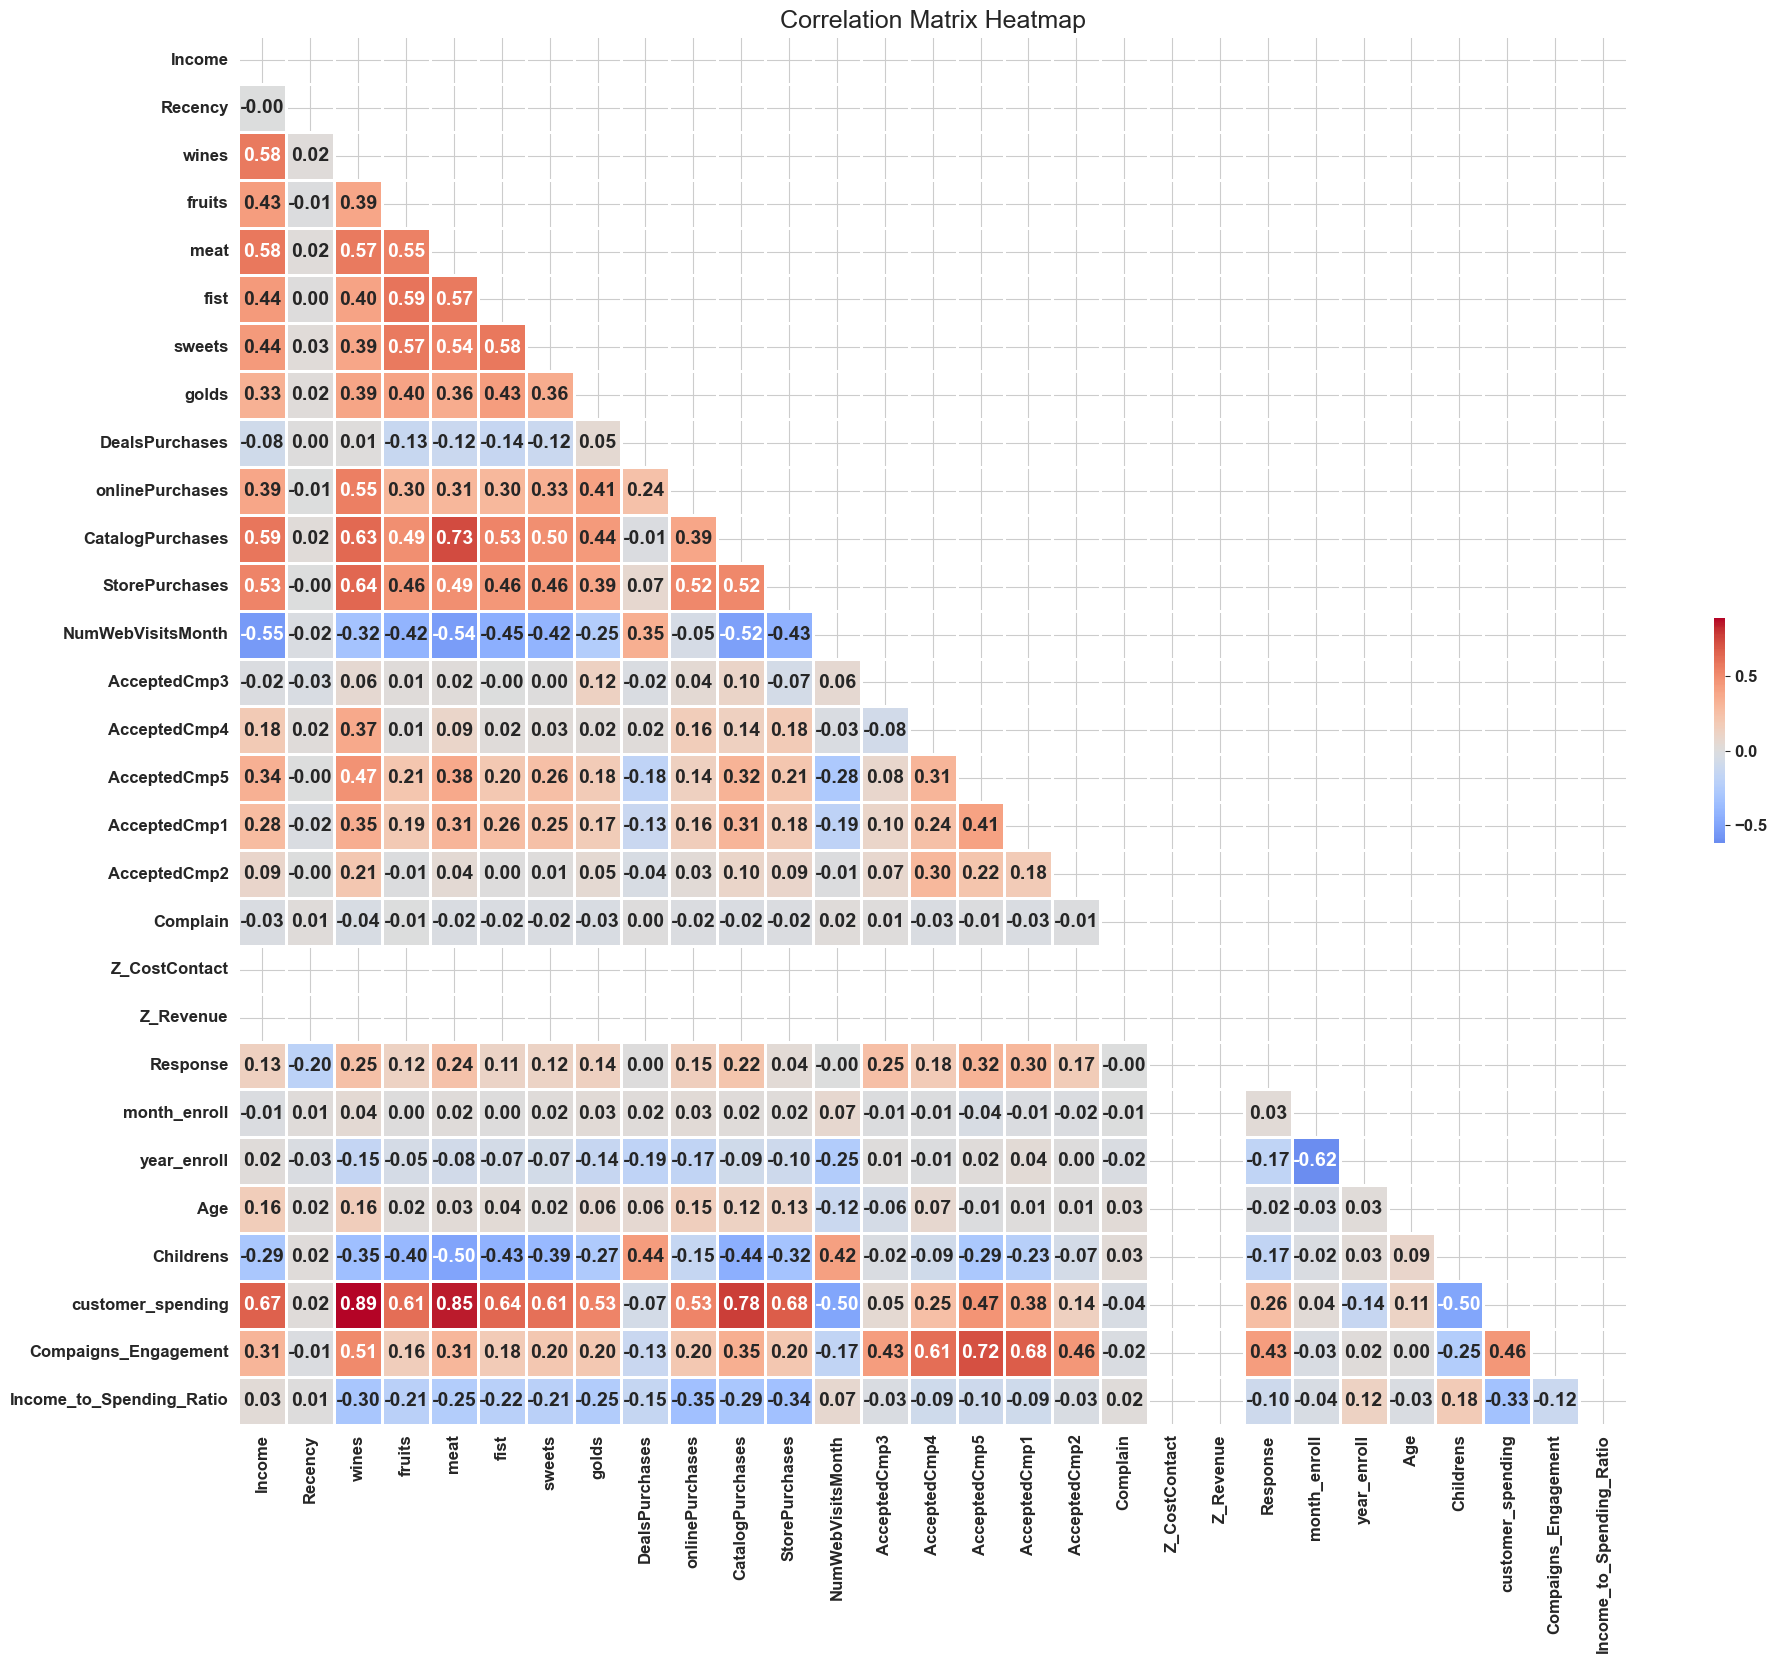

Highly Correlated Features (|correlation| > 0.8):
wines - customer_spending
meat - customer_spending


In [48]:
correlated_features=plot_highly_correlated_features(df_copy[num_features], correlation_threshold=0.8)